## Capstone Project for Data Science - Tinyuka Session

### Project Overview

In this capstone project, you will apply your data science and machine learning skills to develop a predictive model for house prices. This project will involve data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation. You will use a real-world dataset to build a model that can accurately predict house prices based on various features.

### Instruction Prompts

Project Introduction
Objective: Develop a machine learning model to predict house prices using a dataset containing various house-related features.
Dataset: You will use the "House Prices - Advanced Regression Techniques" dataset from Kaggle (or any other relevant house price dataset).


### Project Phases

#### Phase 1: Data Collection and Preparation
Task 1.1: Download the dataset from Kaggle or another source.
Task 1.2: Load the dataset into a Pandas DataFrame.
Task 1.3: Inspect the dataset for missing values and handle them appropriately.
Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

#### Phase 2: Exploratory Data Analysis (EDA)
Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices).
Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.
Task 2.3: Identify and handle outliers in the dataset.
Phase 3: Feature Engineering
Task 3.1: Create new features that may help improve the model's performance.
Task 3.2: Encode categorical variables using one-hot or label encoding techniques.
Task 3.3: Normalize or standardize numerical features as needed.

#### Phase 4: Model Training and Evaluation
Task 4.1: Split the dataset into training and testing sets.
Task 4.2: Choose and justify the selection of machine learning algorithms (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosting).
Task 4.3: Train multiple models and evaluate their performance using appropriate metrics (e.g., RMSE, MAE, R²).
Task 4.4: Perform hyperparameter tuning to optimize the model's performance.
Task 4.5: Select and evaluate the best-performing model on the testing set.

#### Phase 5: Model Interpretation and Reporting
Task 5.1: Interpret the results of the best-performing model and explain the importance of critical features.
Task 5.2: Create visualizations to support your findings and model interpretations.
Task 5.3: Write a comprehensive report summarizing the project, including the methodology, results, and conclusions.






### Deliverables
Code: Submit the complete code used for data preparation, EDA, feature engineering, model training, and evaluation (Jupyter Notebook format)
Report: Submit a detailed report (PDF or Jupyter Notebook format) documenting your approach, findings, and conclusions. The report should include visualizations and a clear explanation of your steps.
Presentation: Prepare a brief presentation (5-10 slides) summarizing your project and key findings. You may be asked to present this to your peers or instructors.

Submit: https://forms.gle/o4h2nihFqvgZX5dr7 


In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations
import seaborn as sns  # Import seaborn for advanced statistical data visualization
from scipy.stats import skew, kurtosis

import math

import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

In [2]:
# Ensure all columns are shown
pd.set_option('display.max_columns', None)

# Phase 1: Data Collection and Preparation

In [3]:
# Task 1.1: Download the dataset from Kaggle or another source.

In [4]:
# Task 1.2: Load the dataset into a Pandas DataFrame.

In [5]:
train = pd.read_csv(r'C:/Users/KLAUS/Desktop/JUPYTER/capstone-project/house-prices-data/train.csv') # load train dataset from file path
houseData_train = train

In [6]:
houseData_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
# I don't need the Id column so i will be dropping it
houseData_train.drop("Id", axis=1, inplace=True)


In [8]:
houseData_train.shape # Checking for the dimension of the dataset

(1460, 80)

In [9]:
# Task 1.3: Inspect the dataset for missing values and handle them appropriately.

In [10]:
houseData_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
pd.set_option('display.max_rows', None) # See all the rows in the series to ascertain the number features with missing values
houseData_train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
def viewMissing_values(data):
    missing_values = data.isna().sum() # Identifying missing values

    missing_values = missing_values[missing_values > 0] # Display columns with missing values and their counts
    
    return missing_values


missing_values = viewMissing_values(houseData_train)

In [13]:
def missingValues_df(data):
    missing_percentage = (missing_values / len(data)) * 100 # Calculating the percentage of missing values

    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})# Combining the count and percentage of missing values

    missing_data = missing_data[missing_data['Missing Values'] > 0] # Filtering to show only columns with missing values
    
    return missing_data

missing_data = missingValues_df(houseData_train)

In [14]:
missing_data

Missing Values  Percentage
LotFrontage              259   17.739726
Alley                   1369   93.767123
MasVnrType                 8    0.547945
MasVnrArea                 8    0.547945
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtFinType2              38    2.602740
Electrical                 1    0.068493
FireplaceQu              690   47.260274
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
PoolQC                  1453   99.520548
Fence                   1179   80.753425
MiscFeature             1406   96.301370

In [15]:

def dropMissingValuesAboveThreshold(data, threshold=50.0):
    # Calculate the percentage of missing values for each column
    missing_data_percentage = data.isnull().mean() * 100
    
    # Identify columns with missing values greater than the threshold
    columns_to_drop = missing_data_percentage[missing_data_percentage > threshold].index
    
    # Drop these columns from the dataset
    data_cleaned = data.drop(columns=columns_to_drop)
    
    return data_cleaned

"""
    There is no intuition in leaving columns with over 50% missing 
    values.
    PoolQC, MiscFeatures, Alley, Fence, FirePlaceQU will be dropped as they show over 50% missing values.
    
"""


# Dropping columns with missing values above the threshold
houseData_train_cleaned = dropMissingValuesAboveThreshold(houseData_train)

In [16]:
houseData_train_cleaned.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [17]:
def fillMissingValues(data):
    # Identify numerical columns (integers and floats)
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    # Fill missing values in numerical columns with the median
    data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
    
    # Identify categorical columns (objects)
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    # Fill missing values in categorical columns with the mode (most frequent value)
    data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])
    
    return data, numerical_columns, categorical_columns
    
houseData_train_cleaned, numerical_columns, categorical_columns = fillMissingValues(houseData_train_cleaned)    

In [18]:
houseData_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Though the target variable has no null values, I still think i should handle the other variables/ features with null values by dropping the variables with over 50% missing values. This much intensity of missing values in PoolQC, MiscFeatures, Alley, Fence, FirePlaceQU etc. can be due to the improper data entry. I think visualizing these variables might give a false sense of perspective.

#### Median was used to fill the missing numerical values because it is robust to outliers, as it will not skew the distribution.

In [19]:
# Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

In [20]:
def checkMissingValues_and_Duplicates_and_datatypes(data):

    no_missing_values = data.isna().sum().sum() # Verifying that there are no missing values left
    
    no_duplicates_rows = data.duplicated().sum()  # Checking datasets for duplicates row
    
    no_duplicates_columns = data.columns.duplicated() # Checking datasets for duplicates columns
    
    data_types = data.dtypes # Checking the dtypes of all the features    
    
    print(f"no_missing_values: {no_missing_values}\n\n"
      f"no_duplicates_rows: {no_duplicates_rows}\n\n"
      f"no_duplicates_columns: {no_duplicates_columns}\n\n"
      f"data_types:  {data_types}\n\n")


    

checkMissingValues_and_Duplicates_and_datatypes(houseData_train_cleaned)

no_missing_values: 0

no_duplicates_rows: 0

no_duplicates_columns: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]

data_types:  MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
Year

### They are no duplicated rows and columns in the dataset after dropping the columns with more than 50% missing values and imputing the numerical and categorical missiong values with median and mode respectively, And also all the variables are in their correct dtypes.

# Phase 2: Exploratory Data Analysis (EDA)

In [21]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices).

In [22]:
# Summary statistics for numerical features
houseData_train_cleaned.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.589041   
std        0.815778      0.220338      1.625393     0.644666    23.997022   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [23]:


# Getting the summary visualization of the numerical features.

# Numerical features

num_numerical_features = len(numerical_columns)
print(f"Number of numerical features: {num_numerical_features}")


# Calculating the number of rows and columns for the subplots
num_rows = math.ceil(num_numerical_features / 6)
num_cols = min(6, num_numerical_features)

# Plotting the distribution of numerical features
plt.figure(figsize=(20, num_rows * 3)) # Setting the fig size for the plot
for i, feature in enumerate(numerical_columns, 1):# looping through the numerical features to make the plot 
    plt.subplot(num_rows, num_cols, i) # setting column and rows for the subplot
    sns.histplot(houseData_train_cleaned[feature], kde=True, bins=30) #seaborn histogram plot with kde
    plt.title(f'Distribution of {feature}') # Setting plot title
plt.tight_layout() #plot layout
plt.show()


Number of numerical features: 37


### This is a summary visualization of all the numerical features, We will zoom in and visualize some key numerical features now

In [24]:
num_zoom_features_1 = ['SalePrice', 'OpenPorchSF', 'GarageArea', 'GarageYrBlt', 'YearBuilt', 'GrLivArea']

In [25]:

# Plotting the distribution of numerical features with skew values
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_zoom_features_1, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(houseData_train_cleaned[feature], orient='h')
    skew_value = skew(houseData_train_cleaned[feature].dropna())
    plt.title(f'Distribution of {feature}\nSkew = {skew_value:.2f}')
        
plt.tight_layout()
plt.show()


### Insights

#### SalePrice(Skew = 1.88):

The distribution is Positively skewed, indicating that most house prices are on the lower side with a few very high values.
From the boxplot it can be seen that most data points are clustered towards the lower end. There are significant outliers at the higher end (above 500,000).
Higher values have many outliers, reflecting the presence of expensive houses in the dataset.


#### OpenPorchSF(Skew = 2.36):

Positively skewed, suggesting most houses have a smaller open porch area, with a few having larger areas.
From the boxplot, Majority of the data is below 200 sqft. There are several high outliers above this value.
Most houses have a small porch, but some have significantly larger ones.


#### GarageArea(Skew = 0.18):

The GarageArea is Slightly positively skewed, indicating a relatively even distribution with a slight inclination towards higher values.
Boxplot shows that the Data is distributed relatively evenly, but there are some outliers with very large garage areas (above 1000 sqft).
The garage area is mostly consistent, with a few houses having much larger garages.


#### GarageYrBlt(Skew = -0.67):

GarageYrBlt is Negatively skewed, indicating more recent garage construction years.
From the Boxplot, Majority of the garages were built after 1950, with a few outliers in the earlier years (pre 1900).
Most garages are built in recent decades, with fewer older constructions.


#### YearBuilt(Skew = -0.61 ):

YearBuilt is Negatively skewed, indicating that most houses were built in more recent years.
From the Boxplot, A large proportion of the houses were built after 1950, with a few older outliers (pre-1900).
Most houses are built in recent decades, with fewer older constructions.


#### GrLivArea(Skew = 1.37):

Positively skewed, suggesting that most houses have a smaller gross living area, with a few much larger houses.
Boxplot shows that Majority of the living areas are below 3000 sqft. There are several outliers with larger living areas above 4000 sqft.


The skewness values indicate that some features have distributions that are not perfectly symmetrical, often leaning towards lower or higher values. This asymmetry can affect statistical analyses and model performance, and it may be necessary to apply transformations or handle outliers in the data preprocessing phase.

Number of categorical_features: 39


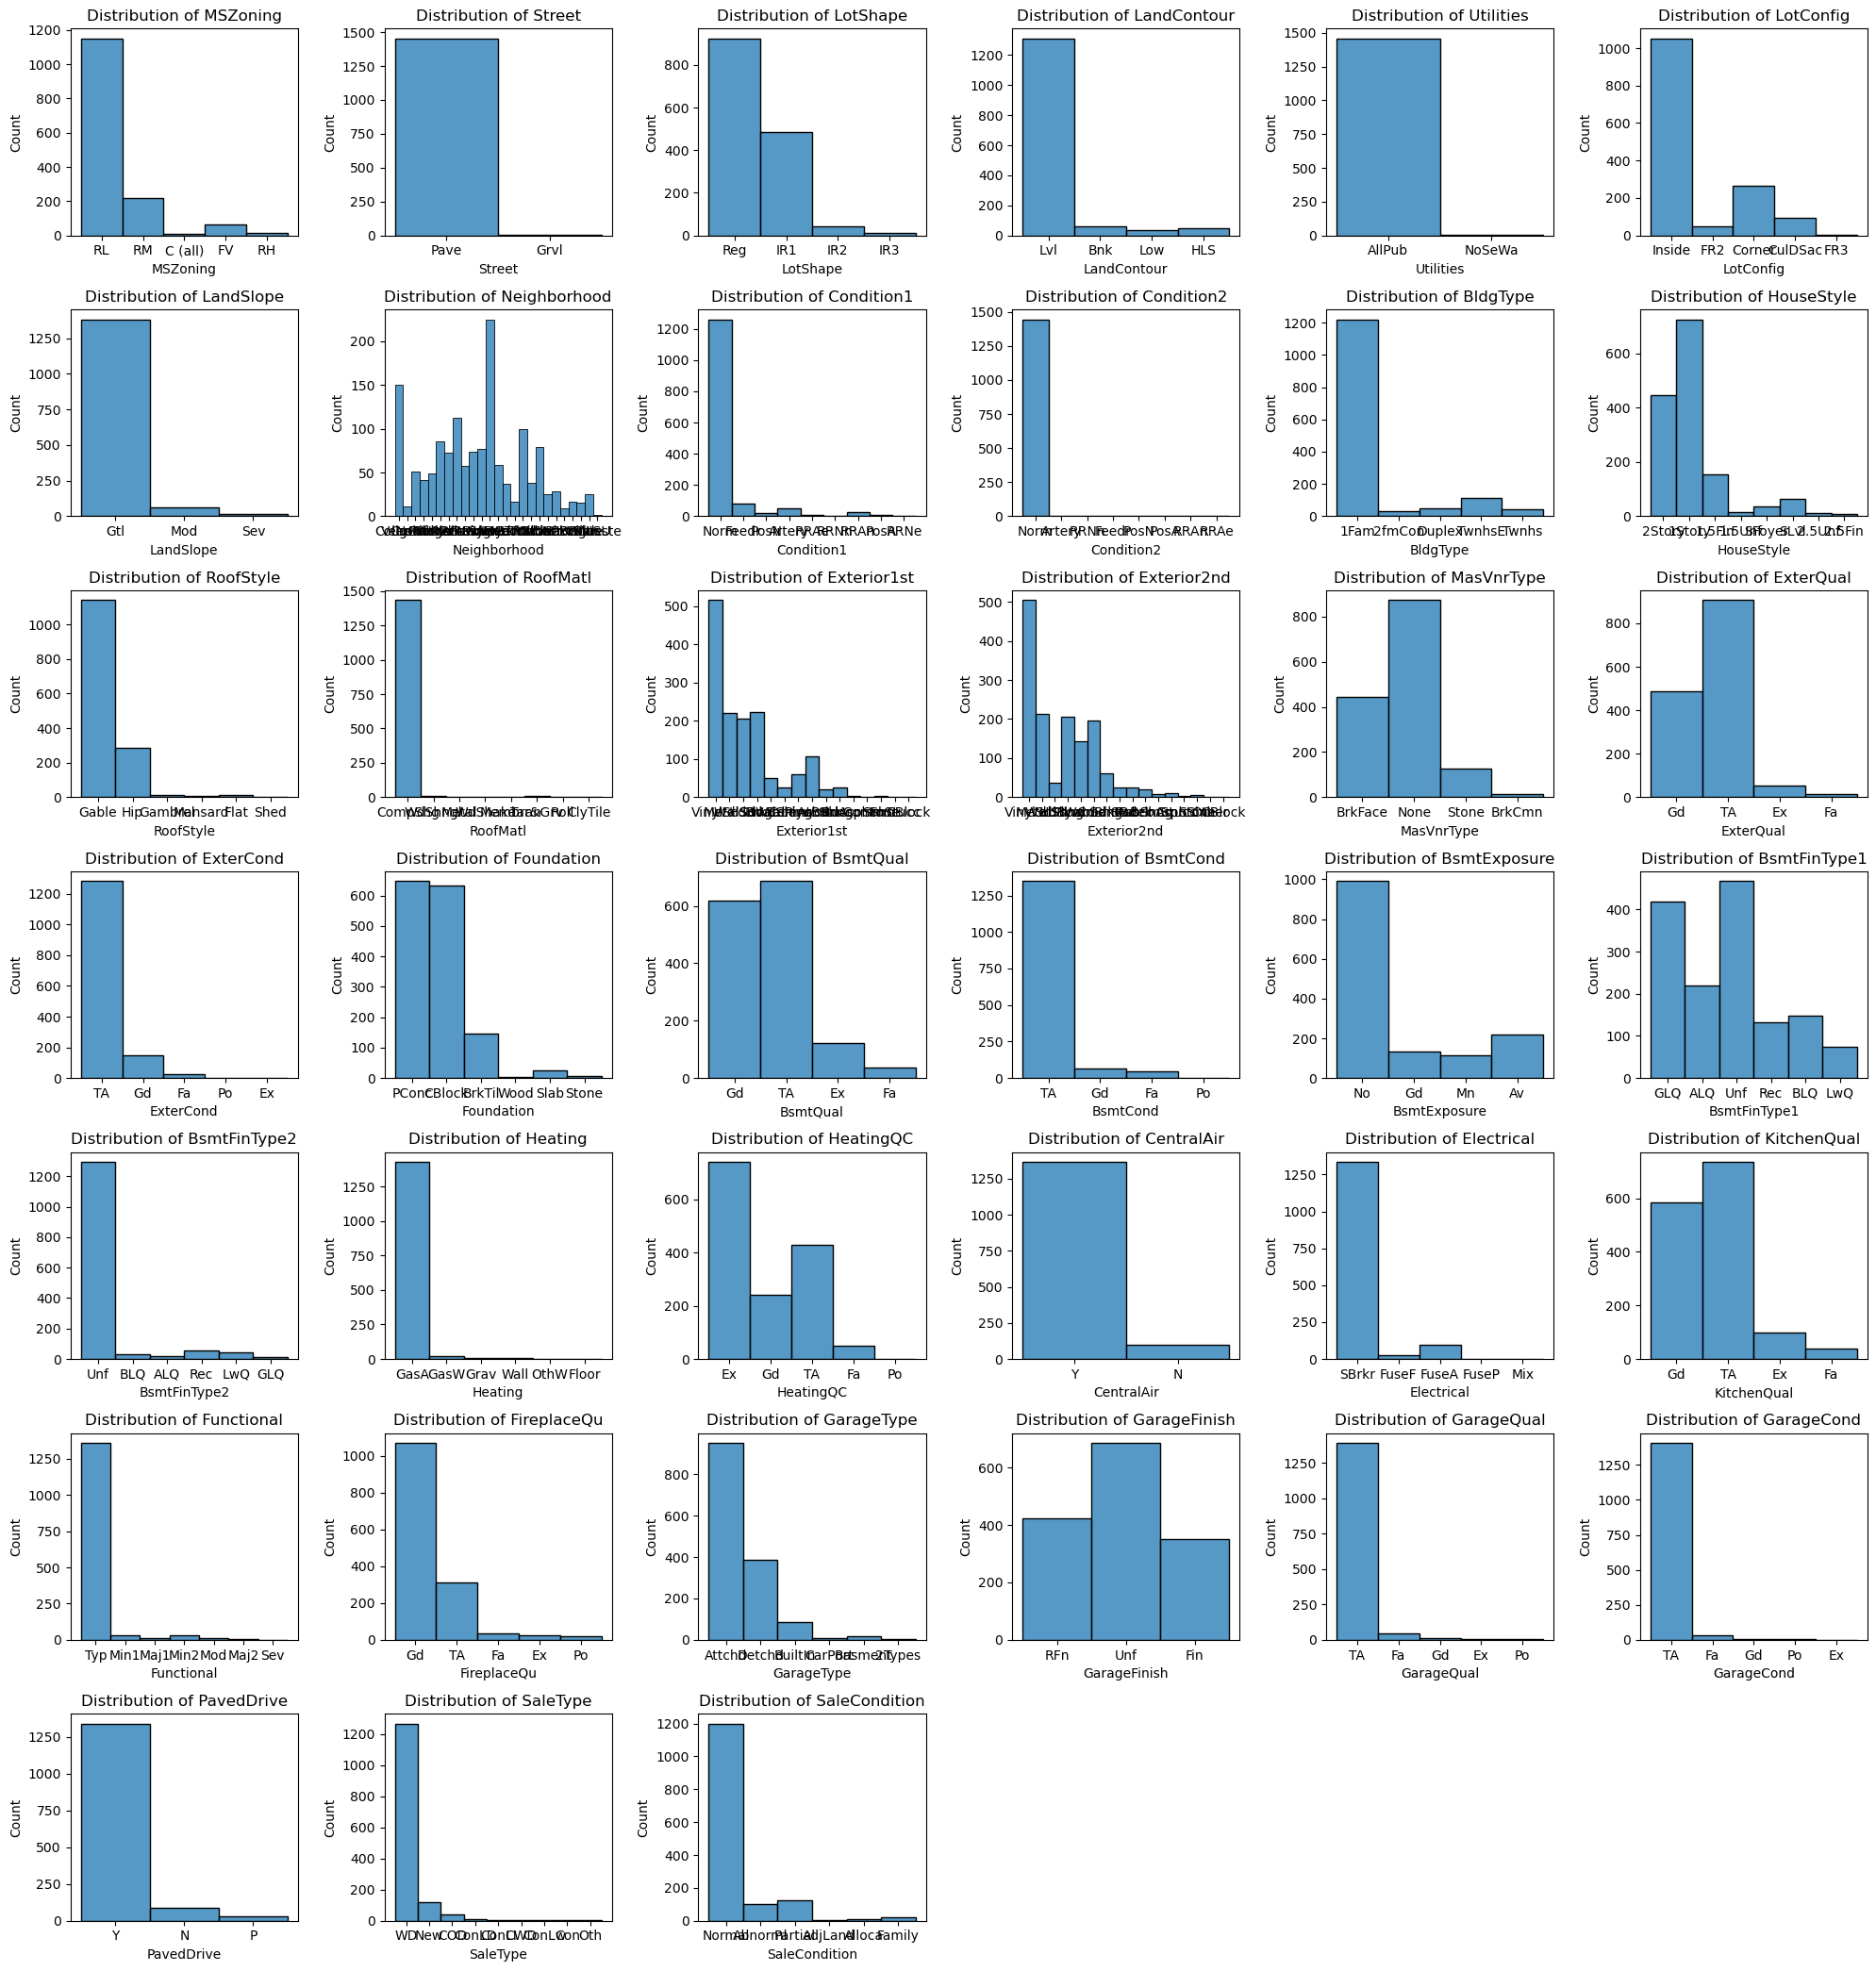

In [26]:

# Getting the summary visualization of the Categorical features.


# Calculating the distribution of categorical features
num_categorical_features = len(categorical_columns)
print(f"Number of categorical_features: {num_categorical_features}")


# Calculate the number of rows and columns for the subplots
num_rows = math.ceil(num_categorical_features / 6)
num_cols = min(6, num_categorical_features)

# Plotting the distribution of numerical features
plt.figure(figsize=(20, num_rows * 3))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(houseData_train_cleaned[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### This is a summary visualization of all the categorical features

In [27]:
# Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

In [28]:
# Computing the correlation matrix of the numerical features
correlation_matrix= houseData_train_cleaned.corr()
correlation_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.004905 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062996 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180819  0.077672     0.065166    -0.001985   
MiscVal         -0.007683    -0.000255  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.116685      0.083348    0.178469    0.214367    0.042463   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [29]:
# Plot of Correclation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation Matrix')
#plt.show()

### The above code, visualizes an Heatmap for the correlation matrix of the numerical features in the House Price Dataset, but a direct Heatmap is crowded and unable to comprehend, So it was commented out, Another Heatmap was ploted to capture only strong correlation instead.

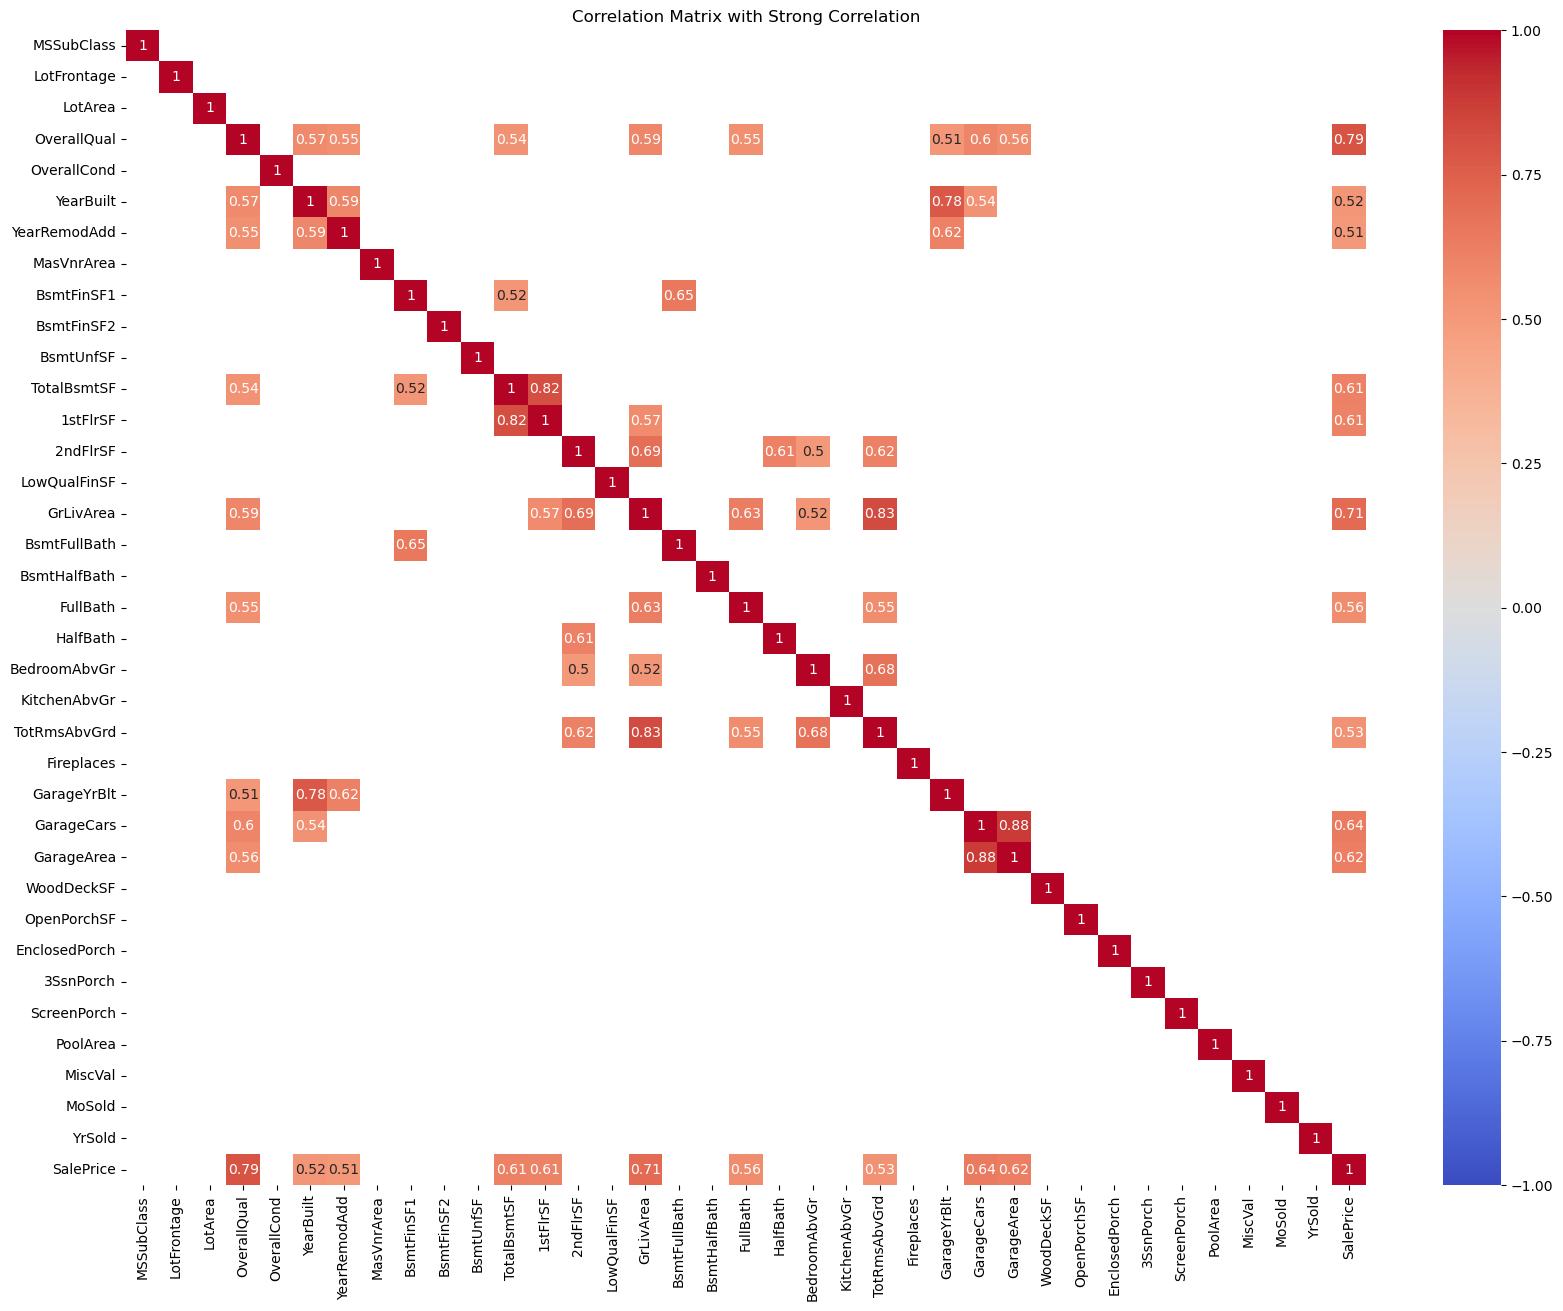

In [30]:

# Filtering to show only strong correlations (e.g., correlation > 0.5)
strong_corr_matrix = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=strong_corr_matrix.isnull())
plt.title('Correlation Matrix with Strong Correlation')
plt.show()


In [31]:

# Function to selectively annotate strong correlations, this shows a better look at the correlation
def annotate_heatmap(ax, data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            correlation = data.iloc[i, j]
            if np.abs(correlation) >= 0.5:  # Only annotate strong correlations
                ax.text(j + 0.5, i + 0.5, f'{correlation:.2f}', ha='center', va='center', color='black')

plt.figure(figsize=(20, 15))
ax = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
annotate_heatmap(ax, correlation_matrix)
plt.title('Correlation Matrix with Strong Correlation Annotations')
plt.show()


### From the Heatmap plotted and also from the calculations of strong positive correlations, it can be seen that GarageArea, GarageCars, GrLivArea, OverallQual, TotalBsmtSF have positve correlation with SalePrice, will use this to explore some visualizations

In [32]:
# Getting the correlation_matrix in relation to SalePrice
correlation_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

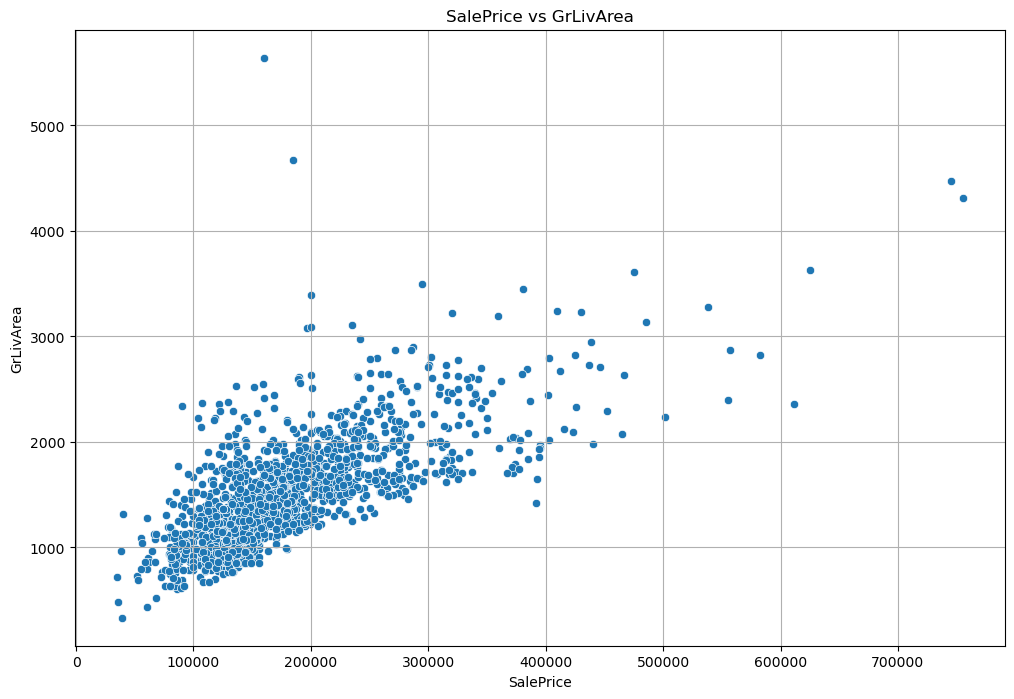

In [33]:
# Scatter plot showing the relationship between SalePrice and GrLivArea

plt.figure(figsize=(12, 8)) # Setting the figsize of the plot
sns.scatterplot(houseData_train_cleaned, x='SalePrice', y='GrLivArea') # Scatter plot of SalaPrice and GrLivArea
plt.title('SalePrice vs GrLivArea') # plot title
plt.ylabel('GrLivArea') # y axis label
plt.xlabel('SalePrice') # x axis label
plt.grid(True) # Adding grid to the plot
plt.show()

From the plot, it can be seen that SalePrice and GrLivArea have a positive correlation mostly, meaning the higher the Above Ground level of the apartment the higher the SalePrice, with some few expection.

We are going to go a bit further by using OverallQual as hue to see how the Overall material and finish quality affect the SalePrice.

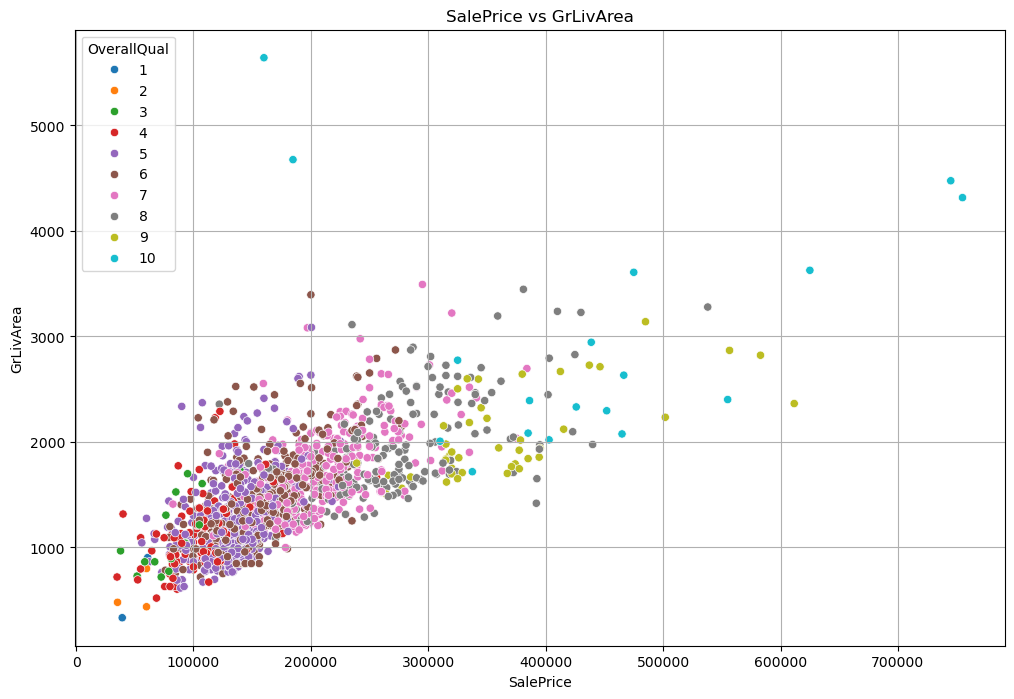

In [34]:
# Scatter plot to show the relationship SalePrice and GrLivArea, as they show a positive correction mostly. 
plt.figure(figsize=(12, 8)) # Setting plot size
sns.scatterplot(houseData_train_cleaned, y='GrLivArea', x='SalePrice', hue='OverallQual', palette="tab10") #scatter plot of SalePrice and GrLivArea, with OverallQuall as hue
plt.title('SalePrice vs GrLivArea') # plot title
plt.ylabel('GrLivArea') # Plot y label
plt.xlabel('SalePrice') # Plot x label
plt.grid(True) # setting grid
plt.show()

### Insights

#### Adding hue (Overall) to the GrLivArea vs SalePrice scatterplot shows how Overall material and finish quality affect the price. OverallQual is ranked from 1-10, with 1 being the least rank and 10 being the highest rank.

#### All the Overall showed similar patterns as The more higher the GrLivArea the higher the SalePrice of the House, but with little outliers, whereby the plot show an almost insignificant entry where higher GrLivArea does not show Higher SalePrice. Take a look at OverallQual( Rank 10) for example.

In [35]:
# Now let's see the Relationship between SalePrice and OverallQual using a Barplot

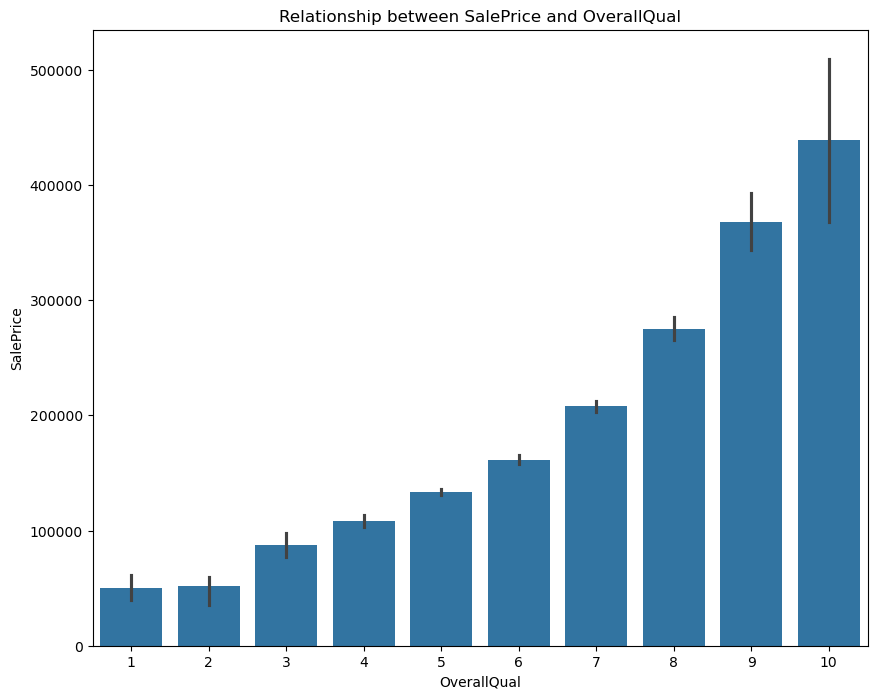

In [36]:
# Barplot Relationship between SalePrice and OverallQual
plt.figure(figsize=(10, 8))
sns.barplot(houseData_train_cleaned, x="OverallQual", y="SalePrice") # barplot of SalePrice and OverallQual
plt.title("Relationship between SalePrice and OverallQual") # plot title
plt.show()

This Barplot shows a clear linear relationship between SalePrice and OverallQual, As we can see the higher the OverallQual the higher the SaleaPrice

In [37]:

# List of features to plot against SalePrice
features = ['GarageArea', 'TotalBsmtSF']

# Scatter Plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=houseData_train_cleaned[feature], y=houseData_train_cleaned['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()


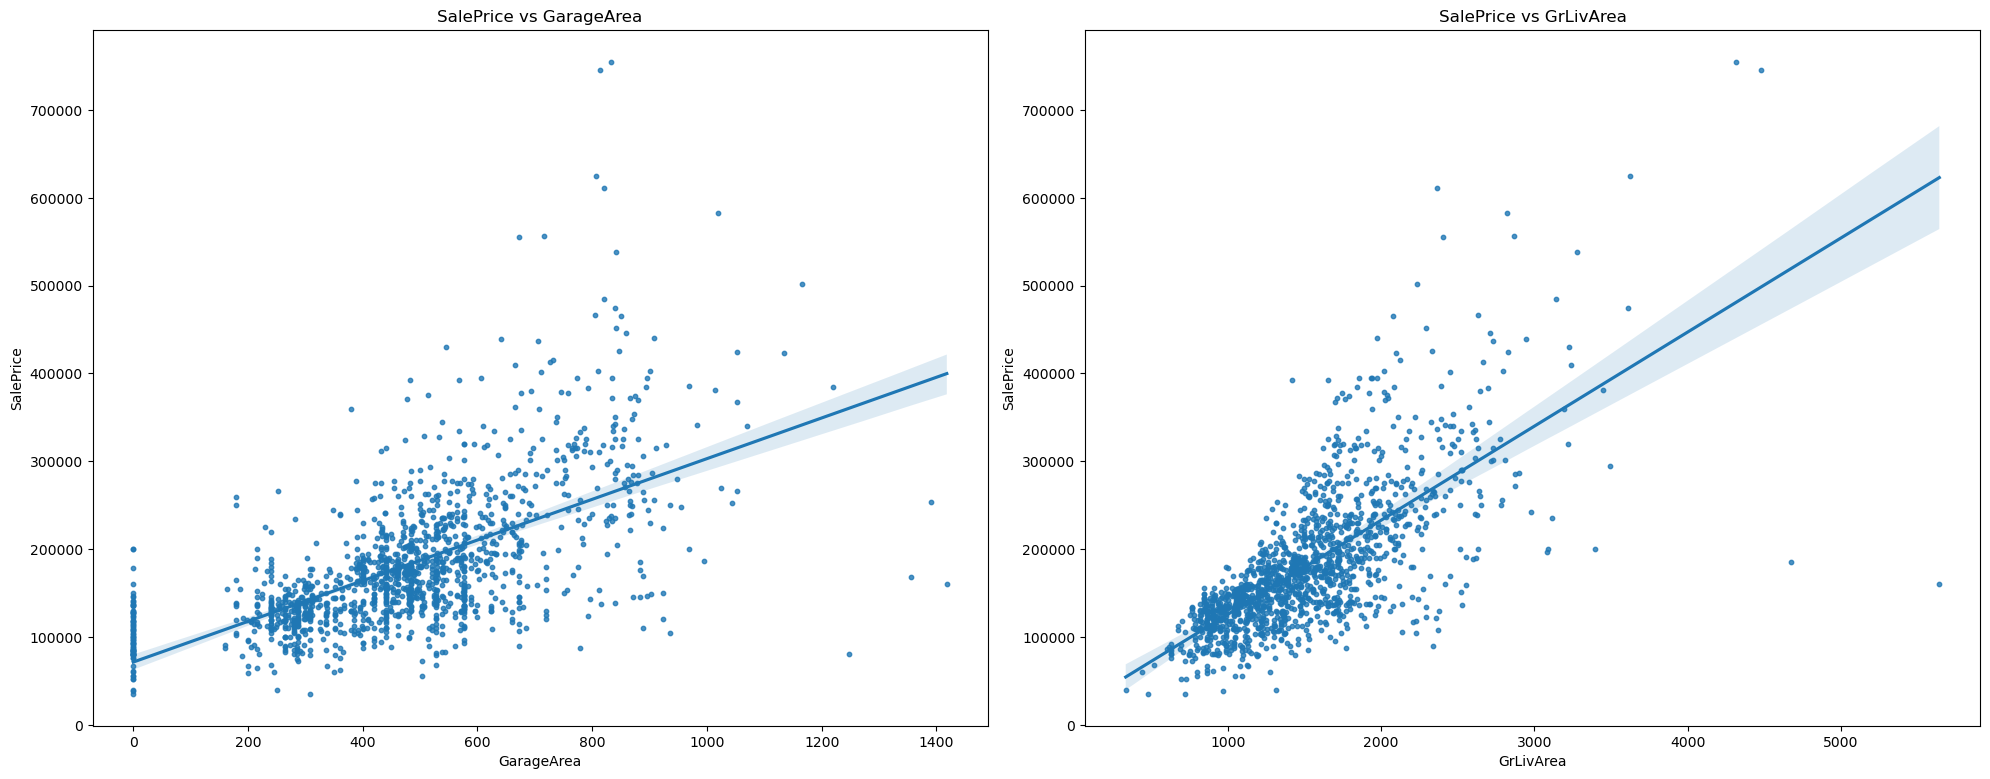

In [38]:
features = ['GarageArea', 'GrLivArea']


# Regression Plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=houseData_train_cleaned[feature], y=houseData_train_cleaned['SalePrice'], scatter_kws={'s': 10})
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

## Insights

#### Positive Correlation: Both plots show a positive correlation between the feature (GarageArea or GrLivArea) and SalePrice. As the GarageArea or GrLivArea increases, the SalePrice tends to increase as well.

#### Regression Line: The regression line indicates the best-fit linear relationship between the feature and the target variable (SalePrice). The slope of the line shows how much the SalePrice is expected to increase with a one-unit increase in the feature.

#### Confidence Interval: The shaded area around the regression line represents the 95% confidence interval. It provides a range within which the true regression line is expected to fall 95% of the time. A narrower band indicates more confidence in the estimated relationship, while a wider band indicates less confidence.

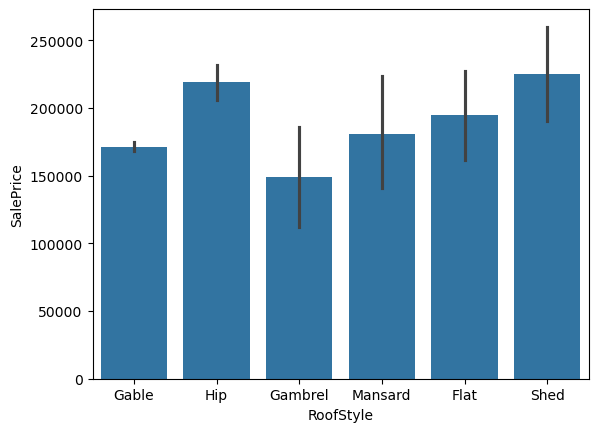

In [39]:
sns.barplot(houseData_train_cleaned, x='RoofStyle', y='SalePrice')
plt.show()

In [40]:
# Task 2.3: Identify and handle outliers in the dataset.

### Kurtosis

#### Kurtosis is the measure of outliers present in the data.

##### High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) indicates little to no outlier, Kurtosis (=3) indicates a normal distribution, like a bell curve, with moderate tailedness. 

Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it indicates how much of the data is in the tails and how sharp or flat the peak of the distribution is.


Types of Kurtosis:
Platykurtic (Kurtosis < 3):

Characteristics: Distributions with light tails and a flatter peak compared to a normal distribution.
Implications: Fewer and less extreme outliers. Data is more evenly spread.
Mesokurtic (Kurtosis = 3):

Characteristics: Distributions with tails and a peak similar to a normal distribution.
Implications: Outliers are as expected for a normal distribution.
Leptokurtic (Kurtosis > 3):

Characteristics: Distributions with heavy tails and a sharper peak compared to a normal distribution.
Implications: More frequent and extreme outliers. Data is more concentrated around the mean but with more extreme deviations.
Effect of Kurtosis on Outliers:
High Kurtosis (Leptokurtic):

Higher likelihood of outliers.
The presence of extreme values is more common.
The distribution has "fat tails," meaning there are more observations that are far from the mean.
Low Kurtosis (Platykurtic):

Lower likelihood of outliers.
Extreme values are less common.
The distribution has "thin tails," meaning there are fewer observations that are far from the mean.

In [41]:
houseData_train_cleaned.kurtosis() # Kurtosis value for the numerical features in the distribution

MSSubClass         1.580188
LotFrontage       21.912954
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.141416
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.258291
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1

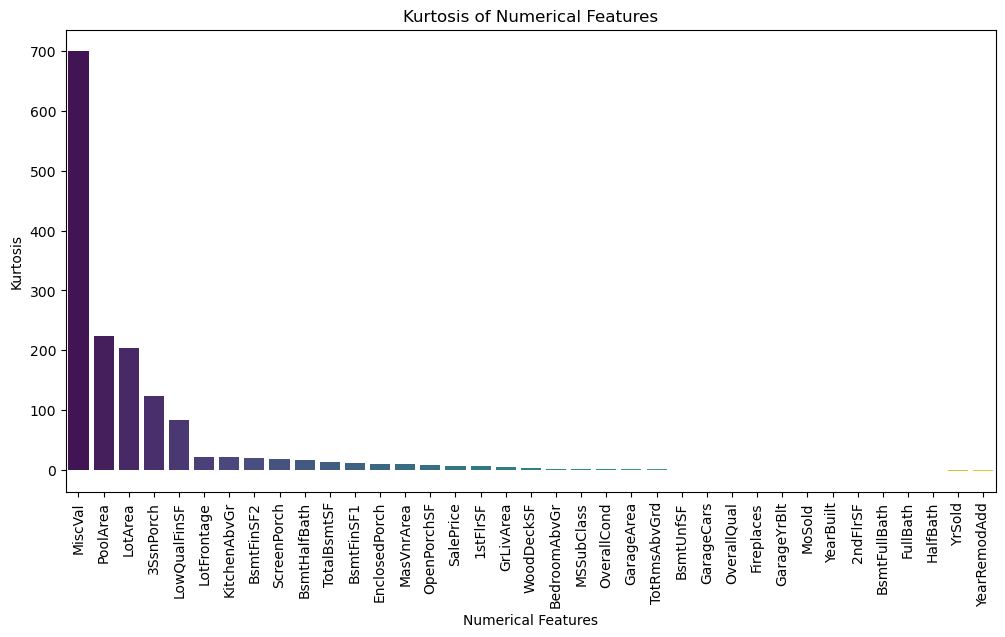

In [42]:
# Calculating the kurtosis using Pandas
kurtosis_values = houseData_train_cleaned.kurt().sort_values(ascending=False)

# Plotting the kurtosis values
plt.figure(figsize=(12, 6))
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Kurtosis of Numerical Features')
plt.xlabel('Numerical Features')
plt.ylabel('Kurtosis')
plt.show()

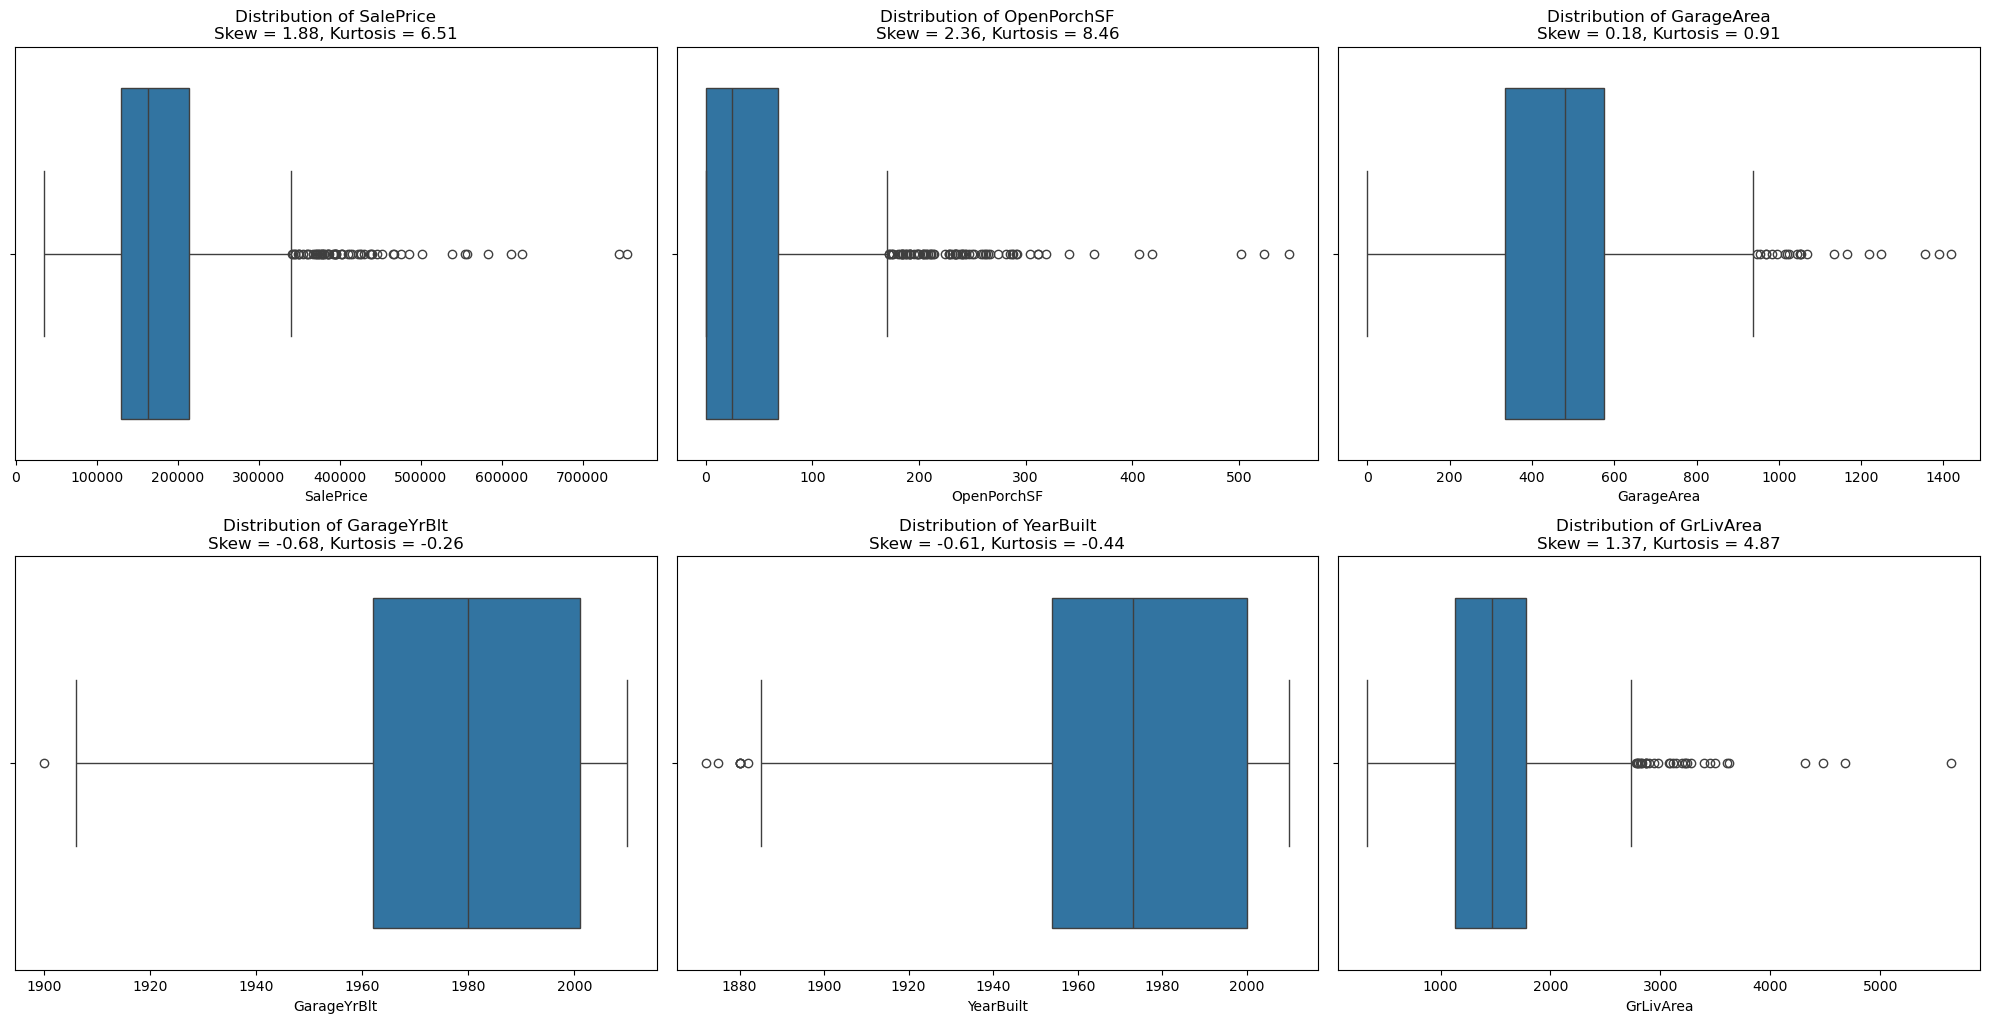

In [43]:

# Visualizations with boxplot
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_zoom_features_1, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(houseData_train_cleaned[feature], orient='h')
    skew_value = skew(houseData_train_cleaned[feature].dropna())
    kurtosis_value = kurtosis(houseData_train_cleaned[feature].dropna())
    plt.title(f'Distribution of {feature}\nSkew = {skew_value:.2f}, Kurtosis = {kurtosis_value:.2f}')
        
plt.tight_layout()
plt.show()

### Insight


SalePrice (Kurtosis = 6.51):
The high kurtosis of 6.51 indicates that the distribution of SalePrice has much heavier tails compared to a normal distribution. This suggests a significant presence of outliers, with many homes having exceptionally high or low prices relative to the central tendency.

OpenPorchSF (Kurtosis = 8.46):
A very high kurtosis value of 8.46 indicates an extreme tailedness in the distribution of OpenPorchSF. This suggests that there are significant outliers, with some homes having much larger open porch areas compared to the rest.

GarageArea (Kurtosis = 0.91):
With a kurtosis value of 0.91, the distribution of GarageArea is close to that of a normal distribution. This indicates relatively lighter tails and fewer extreme outliers compared to SalePrice and OpenPorchSF.

GarageYrBlt (Kurtosis = -0.27):
The negative kurtosis of -0.27 indicates that the distribution of GarageYrBlt has lighter tails than a normal distribution. This suggests that there are fewer extreme outliers in the year the garage was built.

YearBuilt (Kurtosis = -0.44):
Similarly, a kurtosis value of -0.44 for YearBuilt indicates lighter tails, suggesting fewer extreme outliers in the construction years of the homes.

GrLivArea (Kurtosis = 4.87):
A high kurtosis value of 4.87 for GrLivArea suggests heavier tails, indicating the presence of significant outliers with large living areas compared to the majority of homes.


#### Implications for Data Analysis

For features with high skewness and kurtosis, such as SalePrice, OpenPorchSF, and GrLivArea, it will be important to handle outliers. This can be done through various techniques such as transformations (e.g., log transformation), outlier removal, or robust statistical methods that mitigate the impact of outliers.

Normal-like Distributions:
Features with low skewness and kurtosis, such as GarageArea, GarageYrBlt, and YearBuilt, have distributions closer to normal. These features may not require extensive outlier treatment, simplifying the data preprocessing steps for these variables.

In [44]:
houseData_train_cleaned.describe() # This is the summary statistics of the houseData_cleaned dataset

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.589041   
std        0.815778      0.220338      1.625393     0.644666    23.997022   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [45]:
def analyze_and_winsorize(data, features):
    # Create a copy of the original data to modify it
    data_winsorized = data.copy()

    # Initialize lists to store the results for outlier analysis
    feature_list = []
    lower_limit_list = []
    upper_limit_list = []
    iqr_list = []
    num_outliers_list = []
    num_non_outliers_list = []

    # Iterate over each feature provided for outlier analysis
    for feature in features:
        if feature in data.columns:  # Ensure the feature exists in the dataset
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            # Calculate the Interquartile Range (IQR)
            IQR = Q3 - Q1

            # Calculate the lower and upper limits for outliers
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            # Winsorize the data: Cap the values at the lower and upper limits
            data_winsorized[feature] = data_winsorized[feature].clip(lower=lower_limit, upper=upper_limit)

            # Identify the values that were winsorized (capped)
            outliers = (data[feature] < lower_limit) | (data[feature] > upper_limit)

            # Append results to the lists
            feature_list.append(feature)
            lower_limit_list.append(lower_limit)
            upper_limit_list.append(upper_limit)
            iqr_list.append(IQR)
            num_outliers_list.append(len(data[feature][outliers]))
            num_non_outliers_list.append(len(data[feature]) - len(data[feature][outliers]))

    # Create a DataFrame to store the results of the outlier analysis
    outlier_analysis_df = pd.DataFrame({
        'Feature': feature_list,
        'Lower Limit': lower_limit_list,
        'Upper Limit': upper_limit_list,
        'IQR': iqr_list,
        'Number of Outliers': num_outliers_list,
        'Number of Non-Outliers': num_non_outliers_list
    })

    return outlier_analysis_df, data_winsorized
outlier_analysis_df, houseData_winsorized = analyze_and_winsorize(houseData_train_cleaned, numerical_columns)


In [46]:
outlier_analysis_df

Feature  Lower Limit  Upper Limit       IQR  Number of Outliers  \
0      MSSubClass      -55.000      145.000     50.00                 103   
1     LotFrontage       31.500      107.500     19.00                 106   
2         LotArea     1481.500    17673.500   4048.00                  69   
3     OverallQual        2.000       10.000      2.00                   2   
4     OverallCond        3.500        7.500      1.00                 125   
5       YearBuilt     1885.000     2069.000     46.00                   7   
6    YearRemodAdd     1911.500     2059.500     37.00                   0   
7      MasVnrArea     -246.375      410.625    164.25                  98   
8      BsmtFinSF1    -1068.375     1780.625    712.25                   7   
9      BsmtFinSF2        0.000        0.000      0.00                 167   
10      BsmtUnfSF     -654.500     1685.500    585.00                  29   
11    TotalBsmtSF       42.000     2052.000    502.50                  61   
12       1stFlrSF      118.125     2155.125    509.25                  20   
13       2ndFlrSF    -1092.000     1820.000    728.00                   2   
14   LowQualFinSF        0.000        0.000      0.00                  26   
15      GrLivArea      158.625     2747.625    647.25                  31   
16   BsmtFullBath       -1.500        2.500      1.00                   1   
17   BsmtHalfBath        0.000        0.000      0.00                  82   
18       FullBath       -0.500        3.500      1.00                   0   
19       HalfBath       -1.500        2.500      1.00                   0   
20   BedroomAbvGr        0.500        4.500      1.00                  35   
21   KitchenAbvGr        1.000        1.000      0.00                  68   
22   TotRmsAbvGrd        2.000       10.000      2.00                  30   
23     Fireplaces       -1.500        2.500      1.00                   5   
24    GarageYrBlt     1903.500     2059.500     39.00                   1   
25     GarageCars       -0.500        3.500      1.00                   5   
26     GarageArea      -27.750      938.250    241.50                  21   
27     WoodDeckSF     -252.000      420.000    168.00                  32   
28    OpenPorchSF     -102.000      170.000     68.00                  77   
29  EnclosedPorch        0.000        0.000      0.00                 208   
30      3SsnPorch        0.000        0.000      0.00                  24   
31    ScreenPorch        0.000        0.000      0.00                 116   
32       PoolArea        0.000        0.000      0.00                   7   
33        MiscVal        0.000        0.000      0.00                  52   
34         MoSold        0.500       12.500      3.00                   0   
35         YrSold     2004.000     2012.000      2.00                   0   
36      SalePrice     3937.500   340037.500  84025.00                  61   

    Number of Non-Outliers  
0                     1357  
1                     1354  
2                     1391  
3                     1458  
4                     1335  
5                     1453  
6                     1460  
7                     1362  
8                     1453  
9                     1293  
10                    1431  
11                    1399  
12                    1440  
13                    1458  
14                    1434  
15                    1429  
16                    1459  
17                    1378  
18                    1460  
19                    1460  
20                    1425  
21                    1392  
22                    1430  
23                    1455  
24                    1459  
25                    1455  
26                    1439  
27                    1428  
28                    1383  
29                    1252  
30                    1436  
31                    1344  
32                    1453  
33                    1408  
34                    1460  
35                    1460  
36        

In [47]:
houseData_winsorized.SalePrice.describe()

count      1460.000000
mean     177331.526370
std       67205.835915
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      340037.500000
Name: SalePrice, dtype: float64

From the outliers_analysis_df, we all numerical features, Their IQR, the No of outliers, and No of Non outliers.
When all the outliers was removed from the houseData_cleaned dataframe we notice a large some of the data would be lost, and this will impact our model. The "houseData_without_outliers" dataframe show us what will happen if we remove all the outliers.

Further analysis will be done with houseData_cleaned dataframe for further analysis.

In [48]:
houseData_train_cleaned = houseData_winsorized.copy()

In [49]:
houseData_train_cleaned.shape

(1460, 76)

### Phase 3: Feature Engineering

In [50]:
# Task 3.1: Create new features that may help improve the model's performance.

In [51]:
def createNewFeatures(data):
    # Create a copy of the original data to add new features
    data = data.copy()
    
    # Create 'TotalSF' by summing up the relevant square footage columns if they exist
    if all(col in data.columns for col in ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
        data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    
    # Create 'HouseAge' by subtracting 'YearBuilt' from 'YrSold' if they exist
    if 'YrSold' in data.columns and 'YearBuilt' in data.columns:
        data['HouseAge'] = data['YrSold'] - data['YearBuilt']
    
    # Create 'TotalBath' by summing up the bathroom features if they exist
    if all(col in data.columns for col in ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']):
        data['TotalBath'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])
    
    return data

houseData_train_cleaned = createNewFeatures(houseData_train_cleaned)

In [52]:
houseData_train_cleaned.shape # The original clean houseData_Cleaned dataframe with the new features.

(1460, 79)

#### Total Square Footage: Provides a comprehensive measure of the property's size by combining different area components.

#### Age of the House: Older houses might have different value trends compared to newer houses.

#### Total Bathrooms: A more holistic measure of the number of bathrooms, as half baths are considered.

These New features will help to capture additional relationships in the data that was not apparent when EDA was carried out with the original features

In [53]:
# lets see if theres any correlation within the new features and SalePrice.

In [54]:
# Task 3.2: Encode categorical variables using one-hot technique.

In [55]:
def onehotEncoding(data):
    # Apply one-hot encoding to the categorical columns, dropping the first category to avoid multicollinearity
    data_encoded = pd.get_dummies(data, drop_first=True)
    
    return data_encoded
    
houseData_train_encoded = onehotEncoding(houseData_train_cleaned)

In [56]:
houseData_train_encoded.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7          5.0       2003   
1          20         80.0   9600.0            6          7.5       1976   
2          60         68.0  11250.0            7          5.0       2001   
3          70         60.0   9550.0            7          5.0       1915   
4          60         84.0  14260.0            8          5.0       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0           0      150.0          856   
1          1976         0.0       978.0           0      284.0         1262   
2          2002       162.0       486.0           0      434.0          920   
3          1970         0.0       216.0           0      540.0          756   
4          2000       350.0       655.0           0      490.0         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0       854             0     1710.0           1.0             0   
1    1262.0         0             0     1262.0           0.0             0   
2     920.0       866             0     1786.0           1.0             0   
3     961.0       756             0     1717.0           1.0             0   
4    1145.0      1053             0     2198.0           1.0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1           3.0             1             8         0.0   
1         2         0           3.0             1             6         1.0   
2         2         1           3.0             1             6         1.0   
3         1         0           3.0             1             7         1.0   
4         2         1           4.0             1             9         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3              0          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  TotalSF  HouseAge  TotalBath  MSZoning_FV  MSZoning_RH  \
0   208500.0   2566.0         5        3.5            0            0   
1   181500.0   2524.0        31        2.0            0            0   
2   223500.0   2706.0         7        3.5            0            0   
3   140000.0   2473.0        91        2.0            0            0   
4   250000.0   3343.0         8        3.5            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0 

In [57]:
# Task 3.3: Normalize or standardize numerical features as needed.

In [58]:
def normalizeData(data):
    # Identify numerical features, excluding 'SalePrice'
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    if 'SalePrice' in numerical_features:
        numerical_features.remove('SalePrice')
    
    # Create a copy of the original data to apply normalization
    data_normalized = data.copy()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Normalize the numerical features using Min-Max scaling
    data_normalized[numerical_features] = scaler.fit_transform(data[numerical_features])
    
    return data_normalized

houseData_train_normalized = normalizeData(houseData_train_encoded)

In [59]:
houseData_train_normalized.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.32     0.440789  0.430367        0.625        0.375      0.944   
1        0.00     0.638158  0.501390        0.500        1.000      0.728   
2        0.32     0.480263  0.603292        0.625        0.375      0.928   
3        0.40     0.375000  0.498302        0.625        0.375      0.240   
4        0.32     0.690789  0.789186        0.750        0.375      0.920   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.883333    0.477321    0.396490         0.0   0.088994     0.404975   
1      0.433333    0.000000    0.549245         0.0   0.168496     0.606965   
2      0.866667    0.394521    0.272938         0.0   0.257490     0.436816   
3      0.333333    0.000000    0.121306         0.0   0.320380     0.355224   
4      0.833333    0.852359    0.367848         0.0   0.290715     0.548756   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.286636  0.469231           0.0   0.570097           0.4           0.0   
1  0.509575  0.000000           0.0   0.384484           0.0           0.0   
2  0.321779  0.475824           0.0   0.601585           0.4           0.0   
3  0.344293  0.415385           0.0   0.572997           0.4           0.0   
4  0.445329  0.578571           0.0   0.772282           0.4           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.5         0.625           0.0         0.750         0.0   
1  0.666667       0.0         0.625           0.0         0.500         0.4   
2  0.666667       0.5         0.625           0.0         0.500         0.4   
3  0.333333       0.0         0.625           0.0         0.625         0.4   
4  0.666667       0.5         0.875           0.0         0.875         0.4   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.934272    0.571429    0.584066    0.000000     0.358824   
1     0.680751    0.571429    0.490274    0.709524     0.000000   
2     0.915493    0.571429    0.648015    0.000000     0.247059   
3     0.887324    0.857143    0.684253    0.000000     0.205882   
4     0.906103    0.857143    0.891021    0.457143     0.494118   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0  0.090909    0.50   
1            0.0        0.0          0.0       0.0      0.0  0.363636    0.25   
2            0.0        0.0          0.0       0.0      0.0  0.727273    0.50   
3            0.0        0.0          0.0       0.0      0.0  0.090909    0.00   
4            0.0        0.0          0.0       0.0      0.0  1.000000    0.50   

   SalePrice   TotalSF  HouseAge  TotalBath  MSZoning_FV  MSZoning_RH  \
0   208500.0  0.387533     0.040   0.555556          0.0          0.0   
1   181500.0  0.380101     0.248   0.222222          0.0          0.0   
2   223500.0  0.412307     0.056   0.555556          0.0          0.0   
3   140000.0  0.371077     0.728   0.222222          0.0          0.0   
4   250000.0  0.525028     0.064   0.555556          0.0          0.0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0          1.0          0.0          1.0           0.0           0.0   
1          1.0          0.0          1.0           0.0           0.0   
2          1.0          0.0          1.0           0.0           0.0   
3          1.0          0.0          1.0           0.0           0.0   
4          1.0          0.0          1.0           0.0           0.0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0           1.0              0.0              0.0              1.0   
1           1.0              0.0              0.0              1.0   
2           0.0              0.0              0.0              1.0   
3           0.0              0.0              0.0              1.0   
4        

In [60]:
houseData_train_normalized.isna().sum().sum()

0

In [61]:
#saving the final train dataset to csv incase of future used
#houseData_train_normalized.to_csv('final_train.csv', index=False)

## Phase 4: Model Training and Evaluation

In [62]:
# Task 4.1: Split the dataset into training and testing sets.

In [63]:
X = houseData_train_normalized.drop('SalePrice', axis=1)
y = houseData_train_normalized['SalePrice']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(1168, 239)

In [65]:
X_test.shape

(292, 239)

In [64]:
# Task 4.2: Choose and justify the selection of machine learning algorithms (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosting).

In [11]:
# Importing the LinearRegression, DecisionTreeRegressor,RandomForestRegressor, and GradientBoostingRegressor models


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


# MODELS JUSTIFICATION

Linear Regression: Simple and interpretable model that serves as a baseline.

Decision Tree Regressor: Captures non-linear relationships and is easy to interpret.

Random Forest Regressor: Ensemble method that improves the robustness and accuracy over decision trees by averaging multiple trees.

Gradient Boosting Regressor: Powerful ensemble method that builds trees sequentially to minimize errors.

In [77]:
# Task 4.3: Train multiple models and evaluate their performance using appropriate metrics (e.g., RMSE, MAE, R²).

In [12]:
# Training, evaluation, and prediction
results = {}
predictions = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'RMSE': rmse, 'R²': r2}
    
    # Store the first ten predictions
    predictions[model_name] = y_pred[:10]


results_df = pd.DataFrame(results) # Converting results to a DataFrame


predictions_df = pd.DataFrame(predictions) # Convert predictions to a DataFrame

In [79]:
results_df

Linear Regression  Decision Tree  Random Forest  Gradient Boosting
RMSE       1.682638e+12   30390.516033   20398.504397       19367.638233
R²        -5.790810e+14       0.811099       0.914895           0.923280

### Insights

Gradient Boosting has the best performance, with the lowest RMSE and highest R², closely followed by Random Forest. These models are best at predicting the SalePrice.

Decision Tree also performs well, but not as well as the ensemble methods (Random Forest and Gradient Boosting).

Linear Regression performs extremely poorly, which suggests it may not be suitable for this dataset, likely due to non-linear relationships in the data that it cannot capture effectively, So I will not the be using the Linear Regression model for my predictions.

In [68]:
predictions_df # This is the first 10 predictions of all 4 models before any hyperparameter tuning was done

Linear Regression  Decision Tree  Random Forest  Gradient Boosting
0           157636.0       158000.0      139124.50      140237.479183
1           320216.0       340037.5      316301.57      319487.879155
2            93320.0       100000.0      114898.54      121296.140411
3           178856.0       133000.0      155808.50      151894.872810
4           304008.0       295493.0      305619.82      299547.739852
5            71088.0        81000.0       85273.50       78581.298859
6           239900.0       155000.0      194889.50      218391.613095
7           144164.0       148500.0      151191.00      146641.863150
8            60262.0        80000.0       85395.50       77955.857327
9           143990.0       151500.0      133338.12      132059.326353

In [69]:
# Task 4.4: Perform hyperparameter tuning to optimize the model's performance.

### RandomForestRegressor model

In [70]:
# Performing hyperparameter tuning to optimize the RandomForestRegressor model

# Defining the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the best model
best_model_rf = grid_search.best_estimator_
best_model_rf.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=42)

In [71]:
# Task 4.5: Select and evaluate the best-performing model on the testing set.

In [96]:
# Testing and evaluating the model with X_test

pred_rf = best_model_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
r2 = r2_score(y_test, pred_rf)

print(f"Best model - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Best model - RMSE: 20537.44, R²: 0.91


In [97]:
# Creating the DataFrame with 'Id' and predicted 'SalePrice' from the X_test
X_test_preds = pd.DataFrame({
    'Id': X_test.index,    # Assuming 'Id' is the index of X_test
    'SalePrice': pred_rf
})


X_test_preds.head() # Displaying the first few rows of predictions

Id      SalePrice
0   892  138372.301948
1  1105  296798.845000
2   413  113353.199091
3   522  143891.891139
4  1036  295387.195000

In [112]:
# Saving the model to a file
joblib.dump(model, 'best_model_rf.joblib')

['best_model_rf.joblib']

In [24]:
# Loading the test data
testData = pd.read_csv(r'C:/Users/KLAUS/Desktop/JUPYTER/capstone-project/house-prices-data/test.csv') # load test dataset from file path

houseData_test = testData.copy()
ids = houseData_test.pop('Id')

In [66]:
# Preprocessing the test dataset with same functions use to preprocess the training data
houseData_test_cleaned = dropMissingValuesAboveThreshold(houseData_test) # Function that drops columns with over 50% missing values
houseData_test_cleaned, _, _ = fillMissingValues(houseData_test_cleaned) # FUnction to impute missing values   
outlier_analysis_df, houseData_winsorized = analyze_and_winsorize(houseData_test_cleaned, numerical_columns) # Function to detect and handle outliers
houseData_test_cleaned = createNewFeatures(houseData_winsorized) # Functions to create new features
houseData_test_encoded = onehotEncoding(houseData_test_cleaned) # Function to oneHot encode the categorical columns
houseData_test_normalized = normalizeData(houseData_test_encoded) # Function to normalize numerical features.

In [68]:
#missing_values = viewMissing_values(houseData_test) # Function to check missing values

#missing_data = missingValues_df(houseData_test) # Function to check percentage of missing value

#checkMissingValues_and_Duplicates_and_datatypes(houseData_test_cleaned) # Function to check for duplicates and datatypes

In [67]:
test = houseData_test_normalized.copy()
test.isna().sum().sum()

0

In [69]:
test.shape

(1459, 219)

In [70]:
#saving the final train dataset to csv incase of future used
#test.to_csv('final_test.csv', index=False)

In [71]:
# Loading the model from the file
loaded_model = joblib.load('best_model_rf.joblib')
# Getting the feature names from the training data (or the model)
train_features = loaded_model.feature_names_in_

# Adding missing columns to the test data with default values
for col in train_features:
    if col not in test.columns:
        test[col] = 0  # Or an appropriate default value

# Ensuring the columns are in the same order
test = test[train_features]

# Making predictions with the test data
y_pred_rf = loaded_model.predict(test)

In [ ]:
randomForestpredictions = pd.DataFrame({
    'Id': ids,
    'SalePrice': y_pred_rf.squeeze()
})

In [ ]:
randomForestpredictions.head() # first 5 predictions using the randomForest regressor

# DecisionTreeRegressor Model

In [74]:


# Step 1: Define the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Step 2: Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Step 3: Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)

grid_search.fit(X_train, y_train)

# Step 4: Extract the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_dt = best_dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Output the results
print(f"Best DecisionTreeRegressor - RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best DecisionTreeRegressor - RMSE: 28306.19, R²: 0.84
Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [81]:
# Creating the DataFrame with 'Id' and predicted 'SalePrice' from the X_test
X_test_pred_dt = pd.DataFrame({
    'Id': X_test.index,    # Assuming 'Id' is the index of X_test
    'SalePrice': y_pred_dt
})


X_test_pred_dt.head() # Displaying the first few rows of predictions

Id      SalePrice
0   892  156312.500000
1  1105  329030.357143
2   413  111342.857143
3   522  166366.666667
4  1036  295741.312500

In [80]:
# Saving the model for later use
joblib.dump(model, 'best_dt_model.joblib')

['best_dt_model.joblib']

In [84]:
# Loading the saved model from the file
loaded_model_dt = joblib.load('best_dt_model.joblib')

# Getting the feature names from the training data (or the model)
train_features = loaded_model_dt.feature_names_in_

# Adding missing columns to the test data with default values
for col in train_features:
    if col not in test.columns:
        test[col] = 0  # Or an appropriate default value

# Ensuring the columns are in the same order
test = test[train_features]

# Making predictions with the test data
pred_dt = loaded_model_dt.predict(test)

In [86]:
DecisionTree_predictions = pd.DataFrame({
    'Id': ids,
    'SalePrice': pred_dt
})

In [88]:
DecisionTree_predictions.head()

Id      SalePrice
0  1461  124861.980331
1  1462  161383.736555
2  1463  189965.981004
3  1464  189886.046704
4  1465  177229.315811

# Gradient Boosting Regressor

In [6]:
train = pd.read_csv('final_train.csv')

In [17]:
test = pd.read_csv('final_test.csv')

In [18]:
test.shape

(1459, 219)

In [8]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

# Step 1: Define the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Step 2: Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Step 3: Perform Randomized Search with cross-validation
random_search_gb = RandomizedSearchCV(estimator=gb_regressor, 
                                      param_distributions=param_dist, 
                                      n_iter=20,  # Number of parameter settings sampled
                                      scoring='neg_mean_squared_error', 
                                      cv=5, 
                                      n_jobs=-1, 
                                      verbose=1,
                                      random_state=42)  # For reproducibility

random_search_gb.fit(X_train, y_train)

# Step 4: Extract the best model
best_gb_model = random_search_gb.best_estimator_

# Evaluate the best model on the test set
y_pred_gb = best_gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Output the results
print(f"Best GradientBoostingRegressor - RMSE: {rmse_gb:.2f}, R²: {r2_gb:.2f}")
print(f"Best Parameters: {random_search_gb.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best GradientBoostingRegressor - RMSE: 18879.28, R²: 0.93
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}


In [13]:
# Saving the model for later use
joblib.dump(model, 'best_gb_model.joblib')

['best_gb_model.joblib']

In [14]:
# Creating the DataFrame with 'Id' and predicted 'SalePrice' from the X_test
X_test_pred_gb = pd.DataFrame({
    'Id': X_test.index,    # Assuming 'Id' is the index of X_test
    'SalePrice': y_pred_gb
})


X_test_pred_gb.head() # Displaying the first few rows of predictions

Id      SalePrice
0   892  145434.881845
1  1105  312207.068924
2   413  109631.473810
3   522  158699.571722
4  1036  310796.440141

In [22]:
# Loading the saved model from file
loaded_model_gb = joblib.load('best_gb_model.joblib')

# Getting the feature names from the training data (or the model)
train_features = loaded_model_gb.feature_names_in_

# Adding missing columns to the test data with default values
for col in train_features:
    if col not in test.columns:
        test[col] = 0  # Or an appropriate default value

# Ensuring the columns are in the same order
test = test[train_features]

# Making predictions with the test data
pred_gb = loaded_model_gb.predict(test)

In [25]:
GradientBoosting_predictions = pd.DataFrame({
    'Id': ids,
    'SalePrice': pred_gb
})

In [26]:
GradientBoosting_predictions.head()

Id      SalePrice
0  1461  124861.980331
1  1462  161383.736555
2  1463  189965.981004
3  1464  189886.046704
4  1465  177229.315811

# Phase 5: Model Interpretation and Reporting

In [ ]:
# Task 5.1: Interpret the results of the best-performing model and explain the importance of critical features.

In [ ]:
# Task 5.2: Create visualizations to support your findings and model interpretations.


In [ ]:
# Task 5.3: Write a comprehensive report summarizing the project, including the methodology, results, and conclusions.